# <center> Nivelamento - Data Science </center>

## Crimes em São Francisco

Utilizando o dataset de [crimes em São Francisco](https://s3-sa-east-1.amazonaws.com/lcpi/54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv), mostre 4 gráficos que indicam as localidades dos crimes (dispersão), reproduzindo a imagem a seguir. Faça com suplots, de tal forma que exista 1 gráfico para cada período do dia (manhã, tarde, noite e madrugada). Além disso, mostre para cada categoria do crime uma cor diferente. Realize os processamentos necessários para criação dos gráficos.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

![](https://s3-sa-east-1.amazonaws.com/lcpi/cabfd987-74ac-4d8e-b461-06d1837a4ee7.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crimes.csv',sep='|')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68994 entries, 0 to 68993
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IncidntNum  68994 non-null  int64  
 1   Category    68994 non-null  object 
 2   Descript    68994 non-null  object 
 3   DayOfWeek   68994 non-null  object 
 4   Date        68994 non-null  object 
 5   Time        68994 non-null  object 
 6   PdDistrict  68993 non-null  object 
 7   Resolution  68994 non-null  object 
 8   Address     68994 non-null  object 
 9   X           68994 non-null  float64
 10  Y           68994 non-null  float64
 11  Location    68994 non-null  object 
 12  PdId        68994 non-null  int64  
 13  periodo     68994 non-null  object 
 14  resolucao   68994 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 7.9+ MB


In [4]:
df.describe()

,IncidntNum,X,Y,PdId
count,6.899400e+04,68994.000000,68994.000000,6.899400e+04
mean,1.625098e+08,-122.423509,37.770902,1.625098e+13
std,3.155045e+06,0.026344,0.023500,3.155045e+11
min,1.600360e+07,-122.513642,37.707968,1.600360e+12
25%,1.604187e+08,-122.433677,37.759692,1.604187e+13
50%,1.608118e+08,-122.417097,37.776977,1.608118e+13
75%,1.660897e+08,-122.406461,37.786204,1.660897e+13
max,1.790023e+08,-122.365565,37.819975,1.790023e+13


In [5]:
df.periodo.unique()

array(['noite', 'manha', 'tarde', 'madrugada'], dtype=object)

In [23]:
df_noite

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
1,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro
11,160010486,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Monday,01/04/2016 12:00:00 AM,21:20,TENDERLOIN,NONE,100 Block of HYDE ST,-122.415670,37.782120,"(37.7821198488931, -122.415669661443)",16001048628100,noite,outro
12,160010492,ASSAULT,THREATS AGAINST LIFE,Sunday,01/03/2016 12:00:00 AM,21:30,SOUTHERN,NONE,200 Block of 6TH ST,-122.406346,37.779167,"(37.7791674218963, -122.406346425632)",16001049219057,noite,outro
13,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,01/04/2016 12:00:00 AM,19:40,MISSION,NONE,2300 Block of 16TH ST,-122.409530,37.765718,"(37.7657184395282, -122.409529913278)",16001050506244,noite,outro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68982,166087540,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,04/15/2016 12:00:00 AM,23:01,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801,"(37.760801062884, -122.435563016294)",16608754006374,noite,outro
68988,160801508,ASSAULT,BATTERY,Sunday,10/02/2016 12:00:00 AM,18:25,SOUTHERN,NONE,200 Block of 8TH ST,-122.411272,37.776033,"(37.7760329501244, -122.411271940537)",16080150804134,noite,outro
68989,160823994,ASSAULT,BATTERY,Sunday,10/09/2016 12:00:00 AM,21:15,MISSION,NONE,18TH ST / MISSION ST,-122.419360,37.761836,"(37.7618358012376, -122.419360352761)",16082399404134,noite,outro
68991,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134,noite,outro


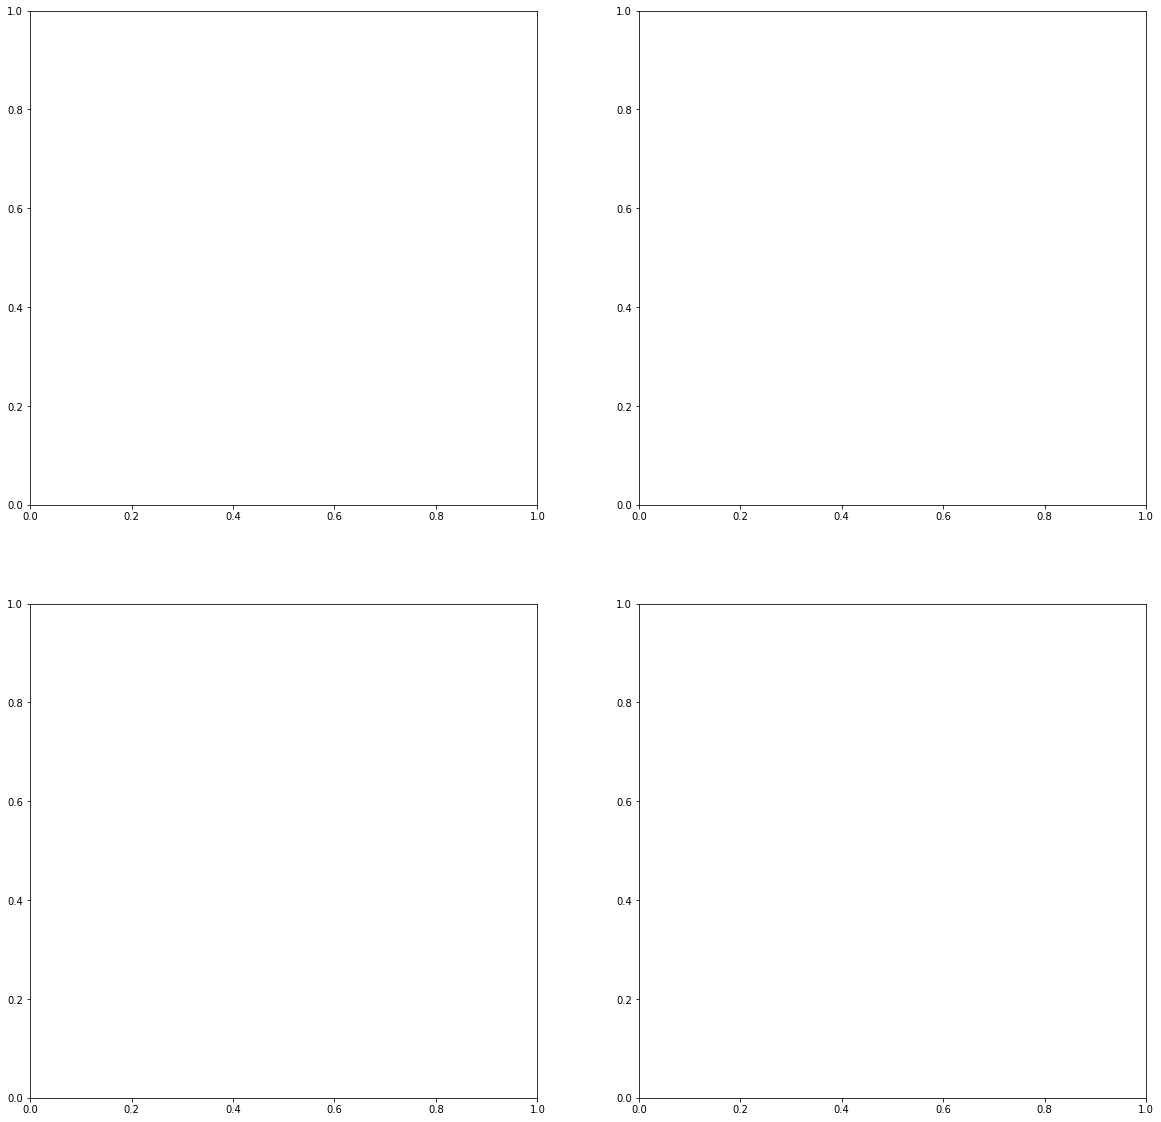

In [27]:
df_manha = df[df['periodo'] == 'manha']
df_tarde = df[df['periodo'] == 'tarde']
df_noite = df[df['periodo'] == 'noite']
df_madrugada = df[df['periodo'] == 'madrugada']

%matplotlib inline

fig, axes = plt.subplots(2, 2,figsize=(20,20))
#axes[0].set_title('Title of the first chart')

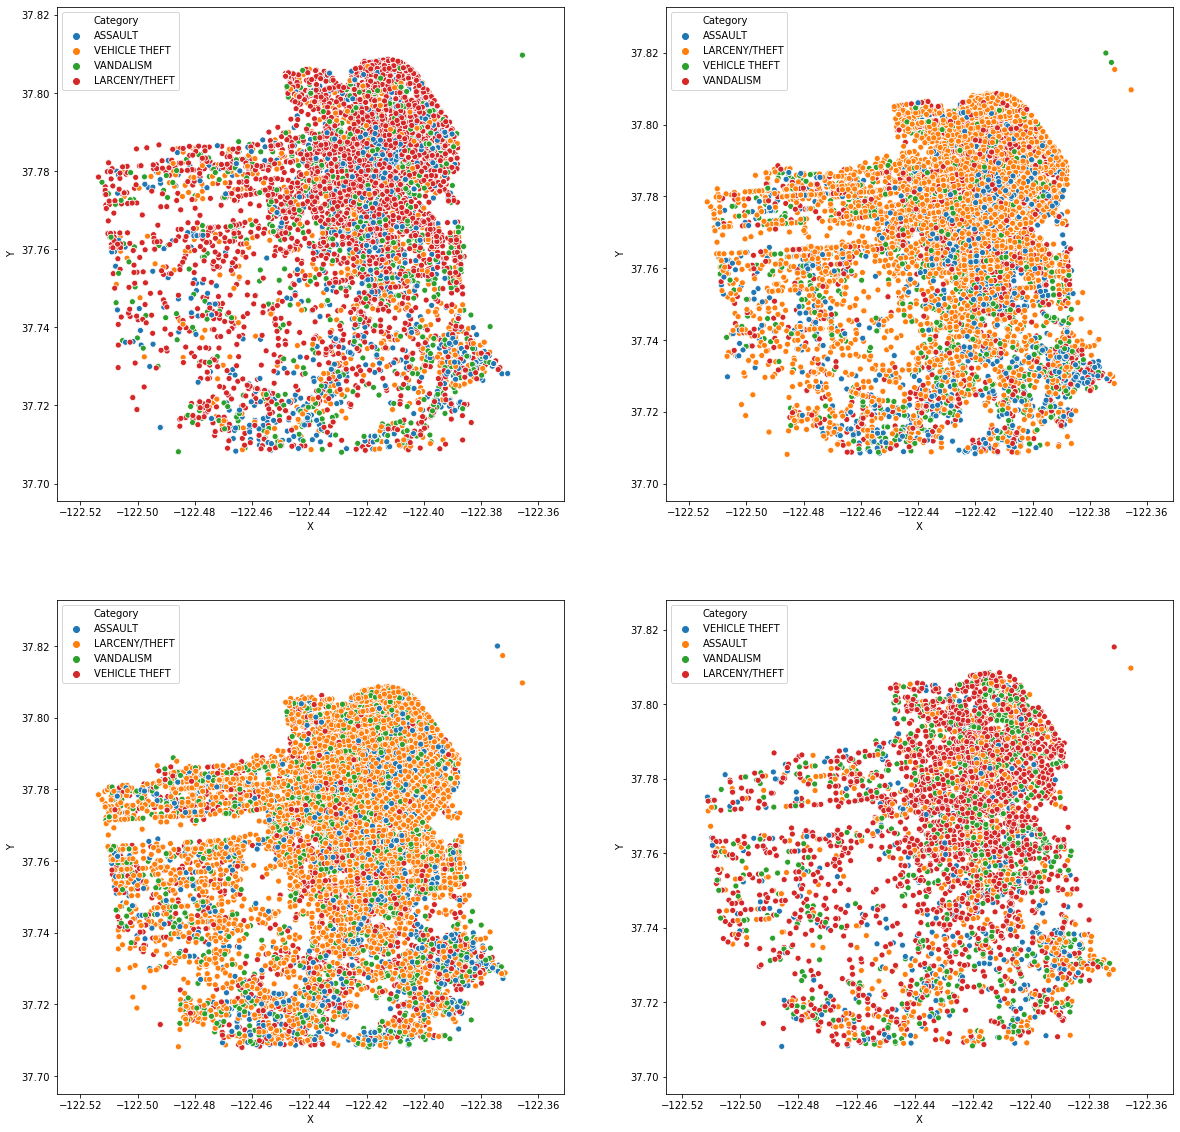

In [28]:
sns.scatterplot(ax=axes[0,0], x=df_manha['X'], y=df_manha['Y'], hue='Category', data = df_manha)
sns.scatterplot(ax=axes[0,1], x=df_tarde['X'], y=df_tarde['Y'], hue='Category', data = df_tarde)
sns.scatterplot(ax=axes[1,0], x=df_noite['X'], y=df_noite['Y'], hue='Category', data = df_noite)
sns.scatterplot(ax=axes[1,1], x=df_madrugada['X'], y=df_madrugada['Y'], hue='Category', data = df_madrugada)
fig

## Regressão Linear  - 35 pts

Ajuste uma regressão linear, sem regularização e sem pré-processamento, usando o dataset disponível no [link](https://s3-sa-east-1.amazonaws.com/lcpi/3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv), tomando as colunas EXPL_X como variáveis explicativas e a coluna RESP como variável resposta. Em seguida, assinale qual das alternativas a seguir denota as 3 variáveis que mais impactam o resultado do modelo.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

- a) EXPL_10, EXPL_9, EXPL_11
- b) EXPL_15, EXPL_23, EXPL_7
- c) EXPL_10, EXPL_7, EXPL_9
- d) EXPL_12, EXPL_14, EXPL_13
- e) EXPL_9, EXPL_11, EXPL_4

In [30]:
import pandas as pd
import statsmodels.api as sm 

data = pd.read_csv("reg.csv")
data.head()

,EXPL_0,EXPL_1,EXPL_2,EXPL_3,EXPL_4,EXPL_5,EXPL_6,EXPL_7,EXPL_8,EXPL_9,...,EXPL_16,EXPL_17,EXPL_18,EXPL_19,EXPL_20,EXPL_21,EXPL_22,EXPL_23,EXPL_24,RESP
0,-0.516612,-0.911046,-1.310863,0.198417,2.178032,0.809620,0.114453,0.017736,-0.597042,1.815517,...,-0.143587,0.476833,-0.802338,0.272534,1.994768,-0.219452,1.076083,-1.664473,-0.295681,271.214983
1,1.575351,0.799166,1.713601,0.868442,0.499717,0.647438,-0.135092,-0.284663,-0.120399,-0.027060,...,-1.463615,-1.284817,0.820637,-1.160558,-0.508827,-1.368782,0.824532,0.904665,-0.326862,-142.054307
2,0.643848,0.133967,-1.277565,1.011164,1.262008,0.933945,0.247755,-0.940966,0.334855,-0.440096,...,0.495279,-0.948654,0.948349,0.558893,0.350821,2.165832,0.607784,-0.403427,-0.107814,2.574030
3,-0.779519,1.226722,-0.202538,0.638357,-0.254927,-0.694636,-0.072524,-0.102900,-1.094016,0.687462,...,-1.372905,-1.885550,0.471528,-0.268754,-1.832324,-0.082042,-0.359472,-0.305451,0.738930,-106.937832
4,-0.083908,0.069170,-0.401373,-0.761437,1.900349,0.401358,-1.058474,-1.242542,-1.743173,-0.772286,...,-1.284766,0.058901,0.649206,0.328945,-0.185247,0.354517,-0.329587,-0.618624,0.439020,22.277815


In [34]:

nomes = ["EXPL_" + str(i) for i in range(0,25)]
#print (nomes)

y = data["RESP"]

for i in range(1,25):
    X = data[nomes[0:i]]
    #X = sm.add_constant(X)
    
    model= sm.OLS(y, X).fit()
    predictions= model.predict(X)
    print(model.summary())
    

                                 OLS Regression Results                                
Dep. Variable:                   RESP   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.3731
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                       0.542
Time:                        22:04:31   Log-Likelihood:                         -3256.8
No. Observations:                 500   AIC:                                      6516.
Df Residuals:                     499   BIC:                                      6520.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                                 OLS Regression Results                                
Dep. Variable:                   RESP   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              190.9
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                   3.28e-197
Time:                        22:04:32   Log-Likelihood:                         -2759.7
No. Observations:                 500   AIC:                                      5551.
Df Residuals:                     484   BIC:                                      5619.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                                 OLS Regression Results                                
Dep. Variable:                   RESP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.535e+30
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:04:32   Log-Likelihood:                          13498.
No. Observations:                 500   AIC:                                 -2.695e+04
Df Residuals:                     476   BIC:                                 -2.685e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

## Vencedor

Baseado nas tabelas, assinale a alternativa com o resultado da query descrita.

**Consulta não liberada.**

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/7dbafb1c-863b-405f-b602-ca67d927cd17.png" width="50%"/></center>

```sql
SELECT id FROM runners
WHERE id NOT IN (SELECT winner_id FROM races)
```

- a) 1 4 5
- b) 2 3 2
- c) Null
- d) John Doe; Alice Jones; Bobby Louis.
- e) 1 2 3

## Resposta: Letra a - 1, 4 e 5

## PLN - 10 pts

Um dos processos de extração de features de um texto consiste em converter um documento, como o apresentado abaixo:

```
"Eu acho que ela acha que ele não acha, mas ele achou."
```

em um vetor, como:

```
(acha, acho, achou, ela, ele, eu, mas, não, que)
[2 1 1 1 2 1 1 1 2]
```

Qual é o nome desse processo?

**Consulta não liberada.**

- a) POS
- b) BOW
- c) TF-IDF
- d) Tokenization
- e) Term Frequency

## Resposta: Letra e - Term Frequency

## Árvores - 10 pts

Algoritmos de árvores só são utilizados para previsão, seja de variável categórica (classificação) ou contínua (regressão).

Verdadeiro ou falso? Justifique.

**Consulta não liberada.**

## Respota: Falso. Não é utilizada apenas para previsão, é utilizada também para classificação, principalmente, e também para regressão.